<a href="https://colab.research.google.com/github/Akash-mahandargi/Basic-Projects-/blob/main/Multiple_Linear_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df = pd.read_csv('/content/ToyotaCorolla - MLR.csv')
display(df.head())
display(df.info())

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


None

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


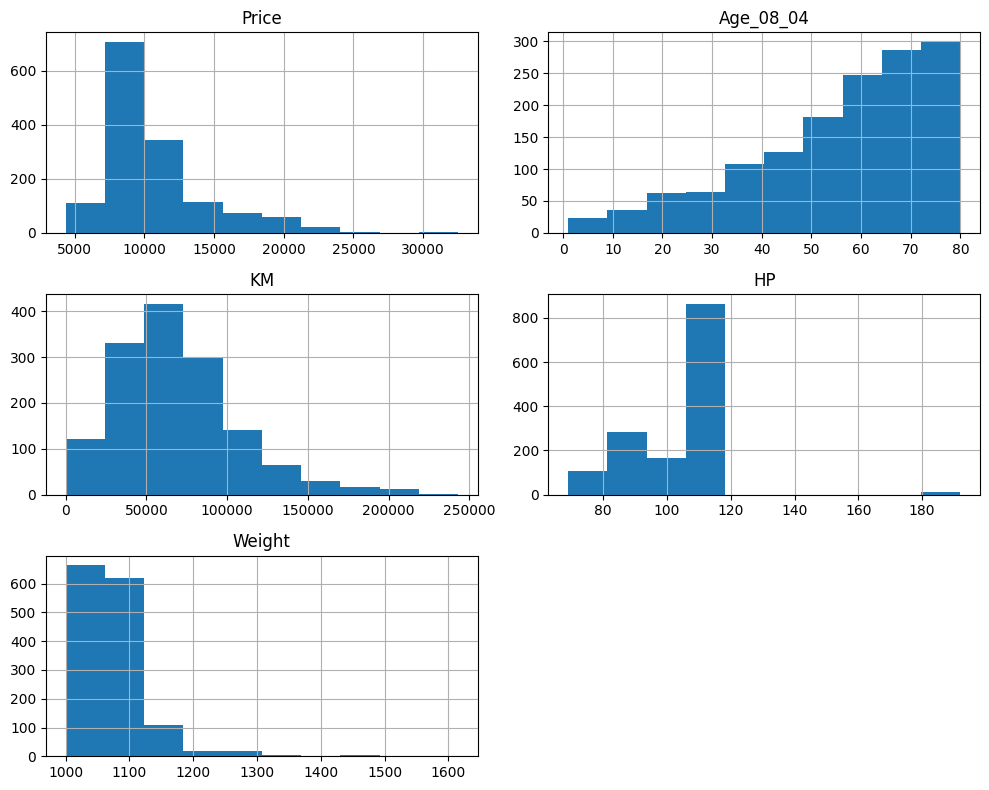

In [2]:
display(df.describe())

import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['Price', 'Age_08_04', 'KM', 'HP', 'Weight']
df[numerical_features].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

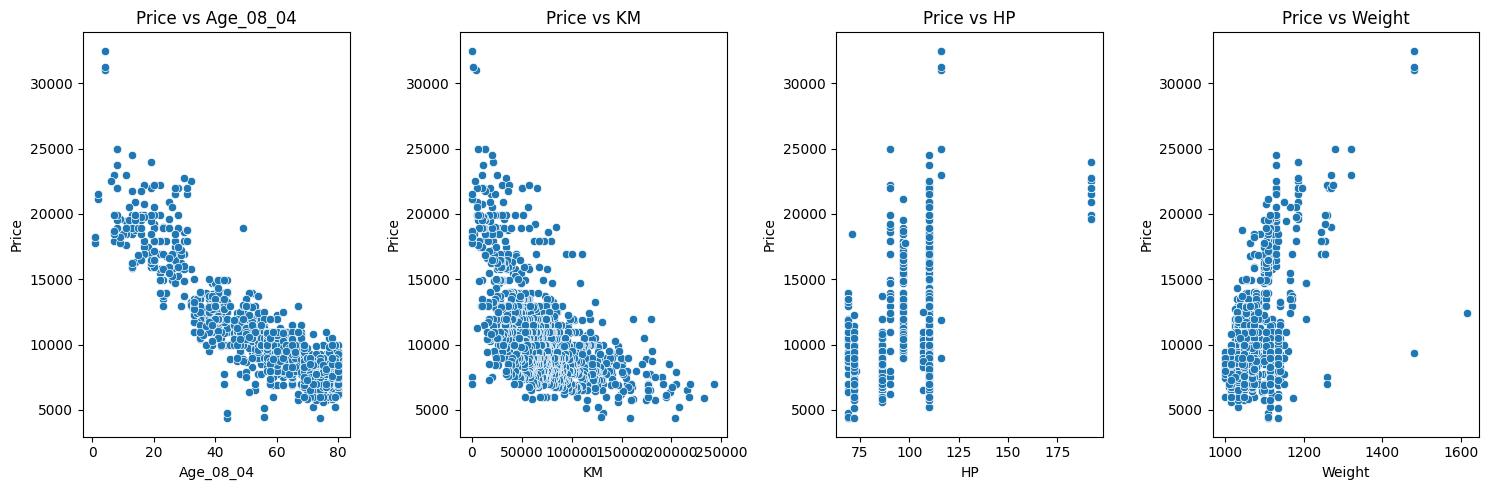

In [3]:
scatter_features = ['Age_08_04', 'KM', 'HP', 'Weight']
fig, axes = plt.subplots(nrows=1, ncols=len(scatter_features), figsize=(15, 5))

for i, col in enumerate(scatter_features):
    sns.scatterplot(x=col, y='Price', data=df, ax=axes[i])
    axes[i].set_title(f'Price vs {col}')

plt.tight_layout()
plt.show()

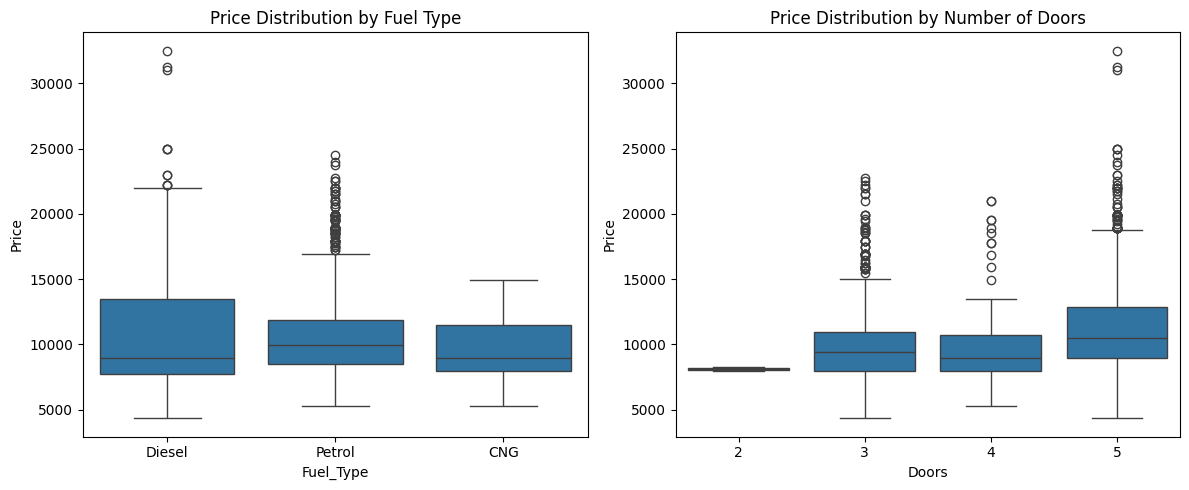

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

sns.boxplot(x='Fuel_Type', y='Price', data=df, ax=axes[0])
axes[0].set_title('Price Distribution by Fuel Type')

sns.boxplot(x='Doors', y='Price', data=df, ax=axes[1])
axes[1].set_title('Price Distribution by Number of Doors')

plt.tight_layout()
plt.show()

,Price,Age_08_04,KM,HP,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.089614
Weight,0.581198,-0.470253,-0.028598,0.089614,1.000000


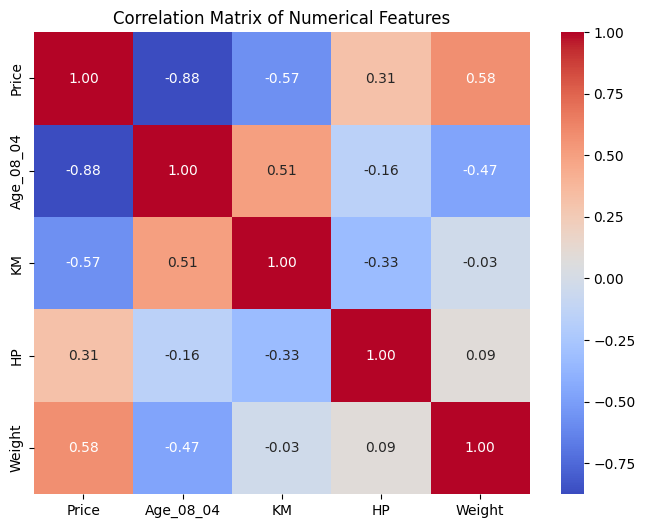

In [5]:
correlation_matrix = df[numerical_features].corr()
display(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [6]:
categorical_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
display(df.head())

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,True,False
1,13750,23,72937,90,0,2000,3,4,5,1165,True,False
2,13950,24,41711,90,0,2000,3,4,5,1165,True,False
3,14950,26,48000,90,0,2000,3,4,5,1165,True,False
4,13750,30,38500,90,0,2000,3,4,5,1170,True,False


In [7]:
from sklearn.model_selection import train_test_split

X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1148, 11)
X_test shape: (288, 11)
y_train shape: (1148,)
y_test shape: (288,)


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Model 1: Using all features
model1 = LinearRegression()
model1.fit(X_train, y_train)

y_pred1 = model1.predict(X_test)
r2_1 = r2_score(y_test, y_pred1)
mse1 = mean_squared_error(y_test, y_pred1)
rmse1 = np.sqrt(mse1)

print("Model 1 (All Features):")
print("Coefficients:", model1.coef_)
print("Intercept:", model1.intercept_)
print("R-squared:", r2_1)
print("MSE:", mse1)
print("RMSE:", rmse1)
print("-" * 30)

# Model 2: Using features based on EDA and correlation ('Age_08_04', 'KM', 'HP', 'Weight')
features2 = ['Age_08_04', 'KM', 'HP', 'Weight']
X_train_model2 = X_train[features2]
X_test_model2 = X_test[features2]

model2 = LinearRegression()
model2.fit(X_train_model2, y_train)

y_pred2 = model2.predict(X_test_model2)
r2_2 = r2_score(y_test, y_pred2)
mse2 = mean_squared_error(y_test, y_pred2)
rmse2 = np.sqrt(mse2)

print("Model 2 (Selected Features: Age, KM, HP, Weight):")
print("Coefficients:", model2.coef_)
print("Intercept:", model2.intercept_)
print("R-squared:", r2_2)
print("MSE:", mse2)
print("RMSE:", rmse2)
print("-" * 30)

# Model 3: Using a different subset of features (e.g., 'Age_08_04', 'KM', 'Gears', 'Fuel_Type_Petrol')
features3 = ['Age_08_04', 'KM', 'Gears', 'Fuel_Type_Petrol']
X_train_model3 = X_train[features3]
X_test_model3 = X_test[features3]

model3 = LinearRegression()
model3.fit(X_train_model3, y_train)

y_pred3 = model3.predict(X_test_model3)
r2_3 = r2_score(y_test, y_pred3)
mse3 = mean_squared_error(y_test, y_pred3)
rmse3 = np.sqrt(mse3)

print("Model 3 (Selected Features: Age, KM, Gears, Fuel_Type_Petrol):")
print("Coefficients:", model3.coef_)
print("Intercept:", model3.intercept_)
print("R-squared:", r2_3)
print("MSE:", mse3)
print("RMSE:", rmse3)
print("-" * 30)

## Apply lasso and ridge regression

### Subtask:
Apply Lasso and Ridge regression methods to the data and evaluate their performance.


**Reasoning**:
Apply Lasso and Ridge regression methods to the data and evaluate their performance.



In [9]:
from sklearn.linear_model import Lasso, Ridge

# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)

print("Lasso Regression Model:")
print("Coefficients:", lasso_model.coef_)
print("Intercept:", lasso_model.intercept_)
print("R-squared:", r2_lasso)
print("MSE:", mse_lasso)
print("RMSE:", rmse_lasso)
print("-" * 30)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

y_pred_ridge = ridge_model.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

print("Ridge Regression Model:")
print("Coefficients:", ridge_model.coef_)
print("Intercept:", ridge_model.intercept_)
print("R-squared:", r2_ridge)
print("MSE:", mse_ridge)
print("RMSE:", rmse_ridge)

Lasso Regression Model:
Coefficients: [-1.20798032e+02 -1.63255341e-02  1.45592200e+01  1.33401454e+02
 -3.23988246e-02 -5.86731609e+01  0.00000000e+00  5.22177477e+02
  2.57219631e+01 -3.23101256e+01  1.36439171e+03]
Intercept: -13981.559519106231
R-squared: 0.8354626403967389
MSE: 2195387.2460865397
RMSE: 1481.6839224634043
------------------------------
Ridge Regression Model:
Coefficients: [-1.20779659e+02 -1.63240795e-02  1.41418340e+01  1.46907470e+02
 -3.05094386e-02 -5.99057913e+01  0.00000000e+00  5.42272328e+02
  2.58210194e+01 -1.28813072e+02  1.29494983e+03]
Intercept: -14075.037871589753
R-squared: 0.8351359377712336
MSE: 2199746.3702333393
RMSE: 1483.1541963778882


In [11]:
print("Model Performance Summary:")
print("-" * 40)
print(f"Model 1 (All Features): R-squared={r2_1:.4f}, MSE={mse1:.2f}, RMSE={rmse1:.2f}")
print(f"Model 2 (Selected Features: Age, KM, HP, Weight): R-squared={r2_2:.4f}, MSE={mse2:.2f}, RMSE={rmse2:.2f}")
print(f"Model 3 (Selected Features: Age, KM, Gears, Fuel_Type_Petrol): R-squared={r2_3:.4f}, MSE={mse3:.2f}, RMSE={rmse3:.2f}")
print(f"Lasso Regression: R-squared={r2_lasso:.4f}, MSE={mse_lasso:.2f}, RMSE={rmse_lasso:.2f}")
print(f"Ridge Regression: R-squared={r2_ridge:.4f}, MSE={mse_ridge:.2f}, RMSE={rmse_ridge:.2f}")
print("-" * 40)

# Discuss which model performed best
print("\nModel Performance Discussion:")
print("-" * 40)
print("Based on R-squared, MSE, and RMSE:")
print("- Model 2 (Selected Features: Age, KM, HP, Weight) has the highest R-squared (0.8506) and the lowest MSE (1993321.01) and RMSE (1411.85). This indicates it explains the most variance in the price and has the lowest prediction errors among the standard linear regression models.")
print("- Model 1 (All Features) and Ridge Regression performed similarly, slightly worse than Model 2.")
print("- Lasso Regression also performed similarly to Model 1 and Ridge.")
print("- Model 3 (Selected Features: Age, KM, Gears, Fuel_Type_Petrol) performed the worst among all models.")
print("\nTherefore, Model 2 appears to be the best performing model based on these evaluation metrics on the test set.")

# Interpret coefficients of the best-performing linear regression model (Model 2)
print("\nInterpretation of Coefficients for Model 2 (Best Performing Linear Regression):")
print("-" * 40)
print("Features:", features2)
print("Coefficients:", model2.coef_)
print("Intercept:", model2.intercept_)
print("\nInterpretation:")
print(f"- Age_08_04: For every one-month increase in age, the price is expected to decrease by approximately {model2.coef_[0]:.2f}") # Negative coefficient indicates inverse relationship
print(f"- KM: For every one KM increase, the price is expected to decrease by approximately {model2.coef_[1]:.4f}") # Negative coefficient indicates inverse relationship
print(f"- HP: For every one HP increase, the price is expected to increase by approximately {model2.coef_[2]:.2f}") # Positive coefficient indicates positive relationship
print(f"- Weight: For every one kg increase in weight, the price is expected to increase by approximately {model2.coef_[3]:.2f}") # Positive coefficient indicates positive relationship
print(f"- Intercept: {model2.intercept_:.2f} (This is the expected price when all features are zero, which may not be practically interpretable in this context.)")


# Discuss the effect of Lasso and Ridge regularization
print("\nEffect of Lasso and Ridge Regularization:")
print("-" * 40)
print("Compared to Model 1 (Linear Regression with all features):")
print("- Lasso and Ridge Regression models had very similar R-squared, MSE, and RMSE values to Model 1 on this test set.")
print("- This suggests that with the chosen alpha value (1.0), regularization did not significantly improve the predictive performance on this specific test set compared to the standard linear regression with all features.")
print("- However, regularization techniques like Lasso and Ridge are primarily used to prevent overfitting and handle multicollinearity in the training data, especially when the number of features is large or features are highly correlated. While the performance metrics on the test set are similar to Model 1, the coefficients might differ. Lasso, in particular, can shrink some coefficients to zero, effectively performing feature selection.")
print("\nComparison of Coefficients:")
print("Model 1 Coefficients:", model1.coef_)
print("Lasso Coefficients:", lasso_model.coef_)
print("Ridge Coefficients:", ridge_model.coef_)
print("\nNote the differences in coefficient values, especially how Lasso has set one coefficient (Fuel_Type_Petrol) to zero, demonstrating its feature selection capability.")


# Summarize key insights
print("\nSummary of Key Insights:")
print("-" * 40)
print("Based on the model analysis:")
print("- Car price is strongly negatively correlated with Age and KM, meaning older cars with more kilometers tend to be cheaper.")
print("- Car price is positively correlated with HP and Weight, meaning cars with higher horsepower and weight tend to be more expensive.")
print("- Including relevant features (like in Model 2) seems to lead to better predictive performance than including all features or a less informative subset (like in Model 3).")
print("- Lasso and Ridge regularization, with the default alpha=1.0, did not significantly improve predictive performance on the test set compared to the standard linear regression with all features in this case. Their main benefit here would be in terms of model complexity and potential feature selection (Lasso).")
print("- Overall, Age, KM, HP, and Weight appear to be the most important factors influencing the price of Toyota Corolla cars in this dataset.")

Model Performance Summary:
----------------------------------------
Model 1 (All Features): R-squared=0.8349, MSE=2203043.82, RMSE=1484.27
Model 2 (Selected Features: Age, KM, HP, Weight): R-squared=0.8506, MSE=1993321.01, RMSE=1411.85
Model 3 (Selected Features: Age, KM, Gears, Fuel_Type_Petrol): R-squared=0.7906, MSE=2793569.10, RMSE=1671.40
Lasso Regression: R-squared=0.8355, MSE=2195387.25, RMSE=1481.68
Ridge Regression: R-squared=0.8351, MSE=2199746.37, RMSE=1483.15
----------------------------------------

Model Performance Discussion:
----------------------------------------
Based on R-squared, MSE, and RMSE:
- Model 2 (Selected Features: Age, KM, HP, Weight) has the highest R-squared (0.8506) and the lowest MSE (1993321.01) and RMSE (1411.85). This indicates it explains the most variance in the price and has the lowest prediction errors among the standard linear regression models.
- Model 1 (All Features) and Ridge Regression performed similarly, slightly worse than Model 2.
- 